In [1]:
#ライブラリのインポート
# 基本的なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ボストン住宅価格データのインポート
from sklearn.datasets import load_boston


In [2]:
# データをデータフレーム型に変換
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 説明変数 x と目的変数 y を準備
boston_df["PRICE"] = boston.target
x = boston_df.drop("PRICE", axis=1)
y = boston_df["PRICE"]


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

<Axes: xlabel='PRICE', ylabel='RM'>

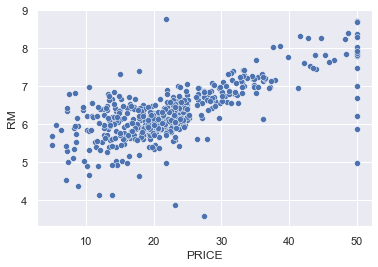

In [3]:
column = "RM"
sns.scatterplot(x="PRICE", y=column, data=boston_df[["PRICE", column]])


In [4]:
# 説明変数と目的変数を一つの行列にする
data = boston_df

# 線形予測子を定義
formula = "PRICE ~ 1 + RM"

# リンク関数を設定
link = sm.genmod.families.links.log()
link_gauss = sm.genmod.families.links.identity()

# 確率分布を設定
family = sm.families.Poisson(link=link)
family_gauss = sm.families.Gaussian(link=link_gauss)

# モデリング（ポアソン分布）
model = smf.glm(formula=formula, data=data, family=family)

# モデリング（正規分布）
model_gauss = smf.glm(formula=formula, data=data, family=family_gauss)

# 推定
result = model.fit()
result_gauss = model_gauss.fit()


In [5]:
print("＝＝＝＝＝モデリング結果＝＝＝＝＝")
print()
print(result.summary())
print("＝＝＝＝＝モデリング結果(model_gauss)＝＝＝＝＝")
print()
print(result_gauss.summary())


＝＝＝＝＝モデリング結果＝＝＝＝＝

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  PRICE   No. Observations:                  506
Model:                            GLM   Df Residuals:                      504
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.2
Date:                Sun, 23 Jul 2023   Deviance:                       908.46
Time:                        01:36:45   Pearson chi2:                     939.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8229
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7139      0.081 

In [6]:
# AIC の確認
print("AIC")
print(result.aic)
print()
print("AIC(model_gauss)")
print(result_gauss.aic)
print()


AIC
3382.3210451034556

AIC(model_gauss)
3350.151117225073



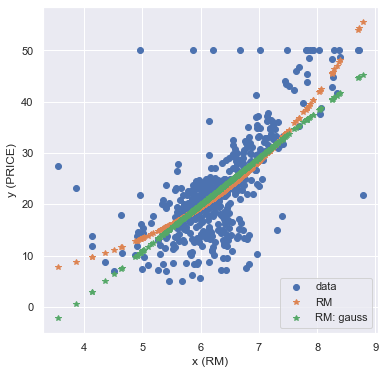

In [7]:
y_hat = result.predict(x)
y_hat_gauss = result_gauss.predict(x)

fig = plt.figure(figsize=(6.0, 6.0))
plt.plot(x["RM"], y, "o", label="data")
plt.plot(x["RM"], y_hat, "*", label="RM")
plt.plot(x["RM"], y_hat_gauss, "*", label="RM: gauss")
plt.xlabel('x (RM)'), plt.ylabel('y (PRICE)')
plt.legend()
plt.show()


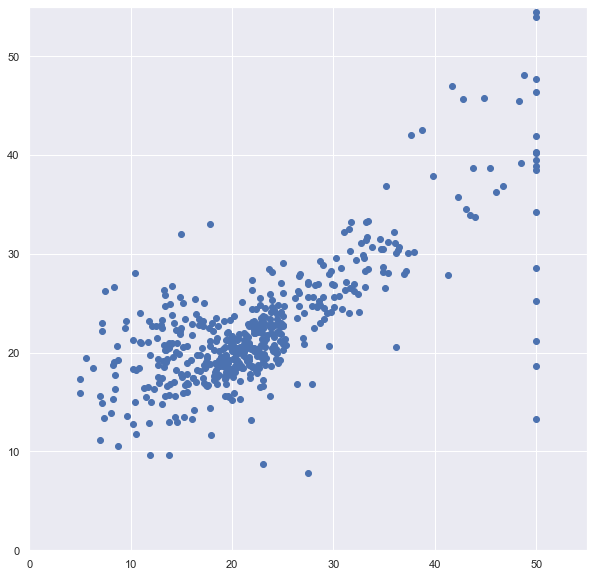

In [8]:
plt.figure(figsize = (10,10))
plt.xlim(0,55)
plt.ylim(0,55)
plt.scatter(y, y_hat)

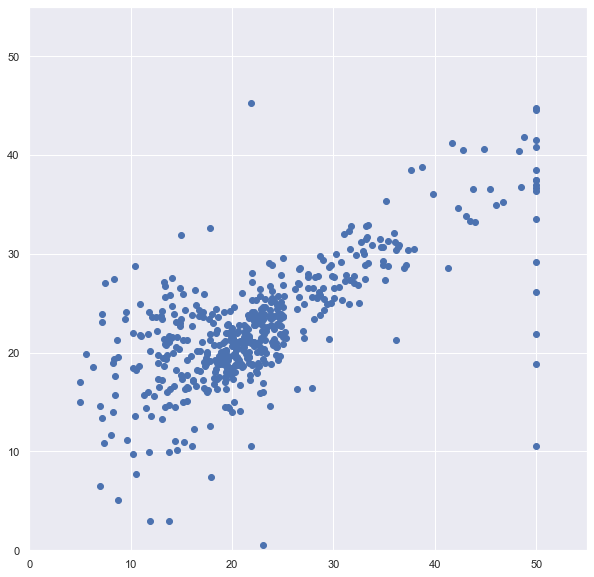

In [9]:
plt.figure(figsize = (10,10))
plt.xlim(0,55)
plt.ylim(0,55)
plt.scatter(y, y_hat_gauss)

In [10]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [12]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

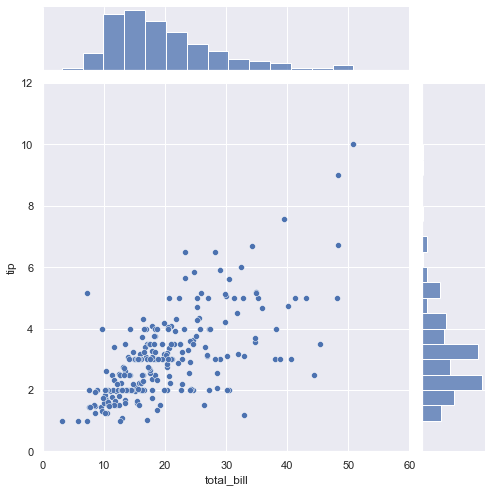

In [13]:
sns.set(style = 'darkgrid')
sns.jointplot(x = 'total_bill', y = 'tip', data = df,
                     kind = 'scatter',
                  xlim = (0, 60), ylim = (0, 12),
                  color = 'b',
                  height = 7
             )

<Axes: >

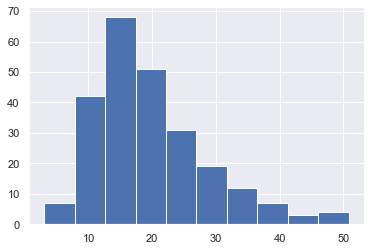

In [14]:
df['total_bill'].hist()

In [19]:
y = df['tip']
x = df['total_bill']
link = sm.families.links.identity()
family = sm.families.Gaussian()

In [22]:
model  = sm.GLM(y, x, family = family)
result = model.fit()
print(result.summary())
print(f'Normal AIC is {result.aic}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      243
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          1.1830
Method:                          IRLS   Log-Likelihood:                -366.22
Date:                Sun, 23 Jul 2023   Deviance:                       287.46
Time:                        20:43:50   Pearson chi2:                     287.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4598
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1437      0.003     44.771      0.0

In [24]:
model = sm.GLM(y, x, family = sm.families.Gamma())
result = model.fit()
print(result.summary())
print(f'Gamma AIC is {result.aic}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      243
Model Family:                   Gamma   Df Model:                            0
Link Function:          inverse_power   Scale:                         0.89072
Method:                          IRLS   Log-Likelihood:                -560.35
Date:                Sun, 23 Jul 2023   Deviance:                       156.63
Time:                        20:44:14   Pearson chi2:                     216.
No. Iterations:                     8   Pseudo R-squ. (CS):            -0.6590
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.0148      0.001     16.551      0.0

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [25]:
model = sm.GLM(y, x, family = sm.families.Poisson())
result = model.fit()
print(result.summary())
print(f'Poisson AIC is {result.aic}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    tip   No. Observations:                  244
Model:                            GLM   Df Residuals:                      243
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.01
Date:                Sun, 23 Jul 2023   Deviance:                       102.71
Time:                        20:45:19   Pearson chi2:                     112.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1435
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.0465      0.001     32.339      0.0